In [1]:
import time
start = time.time() # 시작 시간 저장

In [2]:
from keras.applications import InceptionV3
from keras.layers.normalization import BatchNormalization
from keras.layers import Dense, Input, Activation
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
drive.mount('/drive')


Mounted at /drive


In [3]:
input = Input(shape=(200, 200, 3))
model = InceptionV3(input_tensor=input, include_top=False, weights='imagenet', pooling='max')

for layer in model.layers:
  layer.trainable = False

x = model.output
x = Dense(1024, name='fully', kernel_initializer='uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dense(512, kernel_initializer='uniform')(x)
x = Activation('sigmoid')(x)
x = Dense(101, activation='softmax', name='softmax')(x)
model = Model(model.input, x)
model.summary()

87916544/87910968 [==============================] - 1s 0us/step
Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 99, 99, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 99, 99, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 99, 99, 32)   0           batch_normalization[0][0]        
______________________

In [4]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1. / 255, validation_split=0.2)

In [5]:
batch_size = 16
input_image_size = (200, 200)

train_generator = train_datagen.flow_from_directory(
    '/drive/My Drive/Colab Notebooks/caltech101',
    target_size = input_image_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/drive/My Drive/Colab Notebooks/caltech101',
    target_size = input_image_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    subset='validation'
)

Found 6982 images belonging to 101 classes.
Found 1695 images belonging to 101 classes.


In [6]:
from keras import optimizers

model.compile(
    optimizer=optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['acc']
)

In [7]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(patience=15, mode='auto', monitor='val_acc')
hist = model.fit_generator(train_generator,
                           steps_per_epoch=train_generator.samples // batch_size,
                           validation_data = validation_generator,
                           epochs=100,
                           callbacks=[early_stopping]
                           )


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
436/436 [==============================] - 3212s 7s/step - loss: 0.9941 - acc: 0.7878 - val_loss: 0.6360 - val_acc: 0.8271
Epoch 2/100
436/436 [==============================] - 30s 69ms/step - loss: 0.2115 - acc: 0.9410 - val_loss: 0.5275 - val_acc: 0.8667
Epoch 3/100
436/436 [==============================] - 30s 69ms/step - loss: 0.0849 - acc: 0.9767 - val_loss: 0.4699 - val_acc: 0.8755
Epoch 4/100
436/436 [==============================] - 31s 72ms/step - loss: 0.0517 - acc: 0.9852 - val_loss: 0.4003 - val_acc: 0.8914
Epoch 5/100
436/436 [==============================] - 30s 69ms/step - loss: 0.0477 - acc: 0.9842 - val_loss: 0.4486 - val_acc: 0.8785
Epoch 6/100
436/436 [==============================] - 30s 69ms/step - loss: 0.0306 - acc: 0.9914 - val_loss: 0.7904 - val_acc: 0.8460
Epoch 7/100
436/436 [==============================] - 30s 69ms/step - loss: 0.0437 - acc: 0.9891 - val_loss: 0.66

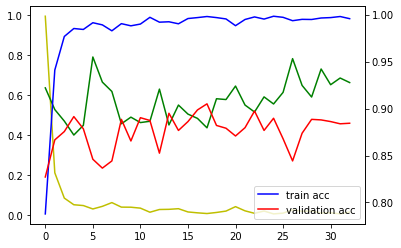

In [8]:
import matplotlib
import matplotlib.pyplot as plt

fig, loss_ax =  plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'g', label='validation loss')
acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'r', label='validation acc')

plt.legend(['train acc', 'validation acc'])
plt.show()

In [9]:
print("실행시간 :", round(time.time() - start, 2),"(초)")  # 현재시각 - 시작시간 = 실행 시간

실행시간 : 4298.47 (초)
